In [1]:
# Import the neccessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.animation as animation
from IPython.display import Image
import geopandas as gpd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, precision_score

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive/')
#Change the current working directory to the path of Google Cloud Drive
path="/content/drive/My Drive/Colab Notebooks/"
os.chdir(path)
os.listdir(path)
#Use the wget command to download the dataset to this path
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/data.csv
file_path = '/content/drive/MyDrive/Crime_Data_from_2020_to_Present_new.csv'

Mounted at /content/drive/
--2024-06-17 15:22:43--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/data.csv
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.19, 3.162.163.34, 3.162.163.11, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.19|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-06-17 15:22:43 ERROR 403: Forbidden.



In [7]:
#file_path = '/Users/brandonwashington/Downloads/Crime_Data_from_2020_to_Present-2.csv'
df = pd.read_csv(file_path)

In [5]:
df.head(60)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535


In [8]:
df.shape

(932140, 28)

In [9]:
# Data Cleaning



lon_min, lon_max = -118.68, -118.15 # Removes crimes that occured outside of city bounds
lat_min, lat_max = 33.69, 34.35
df = df[(df['LON'] >= lon_min) & (df['LON'] <= lon_max) & (df['LAT'] >= lat_min) & (df['LAT'] <= lat_max)] # Remove rows where longitude and latitude are outside the specified bounds


df = df[~((df['LAT'] == 0) & (df['LON'] == 0))] # Now df will contain only the rows where either latitude or longitude is not 0.
df = df.drop_duplicates(subset='DR_NO', keep='first') # Now df will contain only the rows where each value in the first column is unique.
df = df.dropna(subset=['DATE OCC', 'LAT', 'LON']) # Now 'df' will contain only the rows where 'DATE OCC', 'LAT', and 'LON' do not have NaN values.
df.shape
# Find duplicated rows based on the first column
#duplicates = df[df.duplicated(subset='DR_NO', keep=False)]
#duplicates = duplicates.sort_values(by='DR_NO')

(929876, 28)

In [10]:
# Number of Crimes Committed by Day of the Week
df['DATE OCC'] = pd.to_datetime(df['DATE OCC']) # Convert 'DATE OCC' to datetime
df['Day of Week'] = df['DATE OCC'].dt.day_name()# Extract the day of the week and add it as a new column # The day_name() function returns the name of the day in a week (e.g., Monday, Tuesday)
df['Month'] = df['DATE OCC'].dt.month_name()
monthly_crime_count = df['Month'].value_counts().sort_index()
df['Months'] = df['DATE OCC'].dt.month
day_to_num = { 'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7}
df['Days of Week'] = df['Day of Week'].map(day_to_num)# Apply the mapping to the 'Day of the Week' column
#Number of Crimes Committed by Hour of Day
crime_count = df['Day of Week'].value_counts() # Count the number of crimes for each day of the week
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] # Sort the days in the order you prefer (optional, for better visualization)
crime_count = crime_count.reindex(ordered_days)
# Number of Crimes Committed by Day
df['Hour of Day'] = df['TIME OCC'] // 100
hourly_crime_count = df['Hour of Day'].value_counts().sort_index() # Count the number of crimes for each hour
crime_count_by_date = df['DATE OCC'].value_counts().sort_index()
# Number of Crimes Occurred per Year
df['Year'] = df['DATE OCC'].dt.year # Extract the year and create a new column for it
# Filter the DataFrame
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
cutoff_date = pd.Timestamp('2023-12-31')
df = df[(df['Date Rptd'] < cutoff_date) & (df['DATE OCC'] < cutoff_date)] # Remove dates after 1/1/24
# Group by year and count the number of crimes
crime_count_by_year = df.groupby('Year').size()
crime_count_by_area = df['AREA NAME'].value_counts()
#df.to_csv('updated_dataframe.csv', index=False)

# Filter the DataFrame
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
cutoff_date = pd.Timestamp('2024-01-01')
df = df[(df['Date Rptd'] < cutoff_date) & (df['DATE OCC'] < cutoff_date)] # Remove dates after 1/1/24


<ipython-input-10-c6bc874f2d9a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC']) # Convert 'DATE OCC' to datetime
<ipython-input-10-c6bc874f2d9a>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])


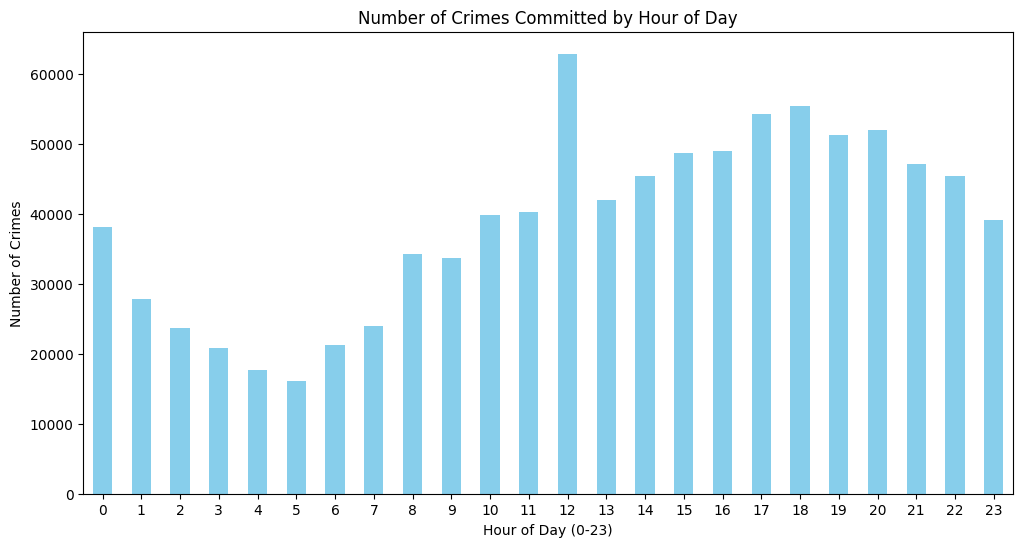

In [11]:
# Number of Crimes Committed by Hour of Day
plt.figure(figsize=(12,6))
hourly_crime_count.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Committed by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24), rotation=0)
plt.show()

In [12]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LOCATION,Cross Street,LAT,LON,Day of Week,Month,Months,Days of Week,Hour of Day,Year
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,Sunday,March,3,1,21,2020
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,NaN,34.0444,-118.2628,Saturday,February,2,7,18,2020
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,NaN,34.0210,-118.3002,Wednesday,November,11,4,17,2020
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,Tuesday,March,3,3,20,2020
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,NaN,34.0944,-118.3277,Monday,August,8,2,12,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876466,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,12800 FILMORE ST,NaN,34.2790,-118.4116,Wednesday,March,3,4,10,2023
876467,231716047,2023-10-02,2023-09-25,2200,17,Devonshire,1798,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,8800 HASKELL AV,NaN,34.2302,-118.4764,Monday,September,9,2,22,2023
876468,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,500 S MAIN ST,NaN,34.0467,-118.2485,Saturday,July,7,7,0,2023
876469,230906458,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,14500 HARTLAND ST,NaN,34.1951,-118.4487,Sunday,March,3,1,9,2023


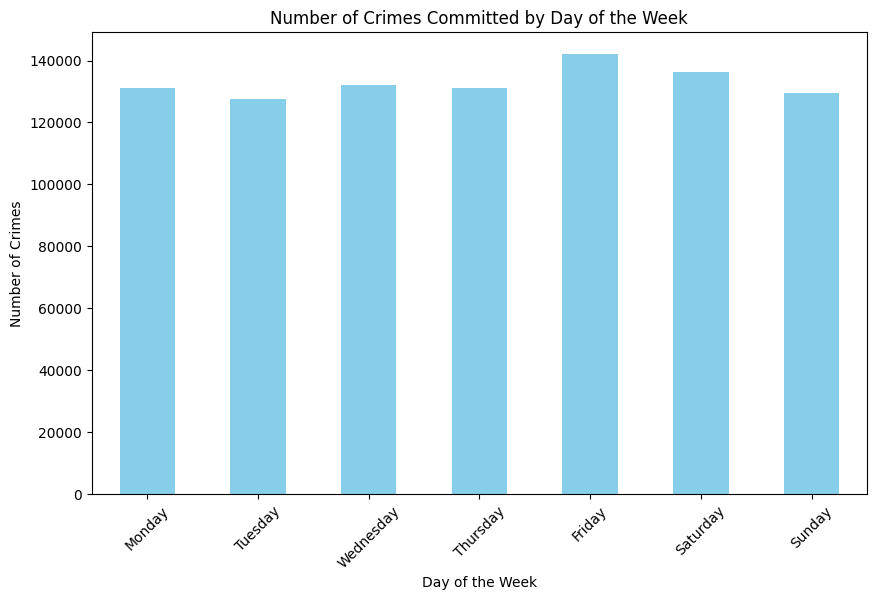

In [13]:
# 'Number of Crimes Committed by Day of the Week
plt.figure(figsize=(10,6))
crime_count.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Committed by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

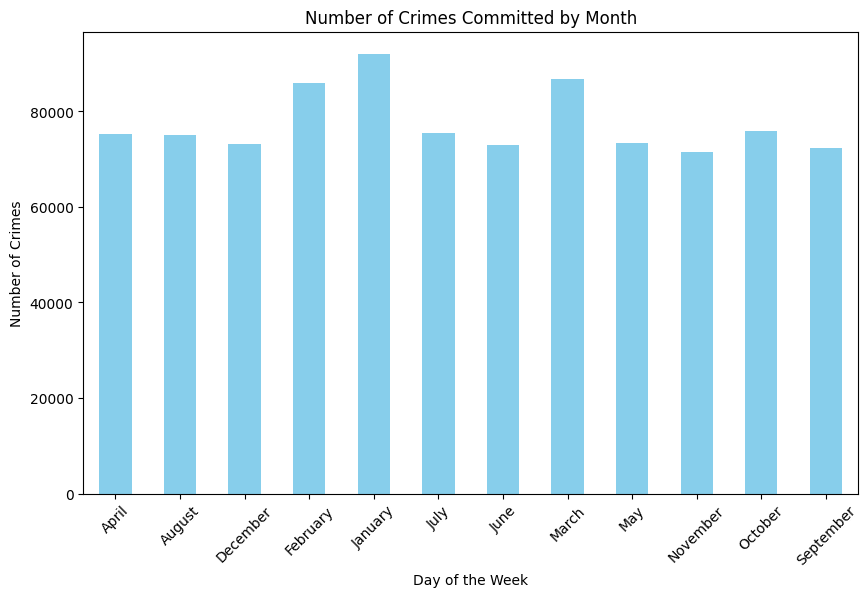

In [14]:
# 'Number of Crimes Committed by Month
plt.figure(figsize=(10,6))
monthly_crime_count.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Committed by Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

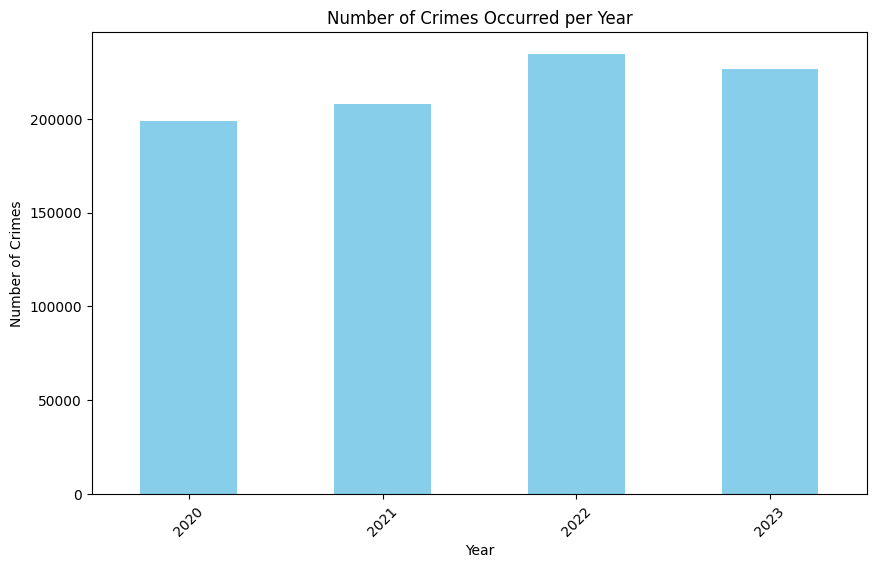

In [15]:
# Number of Crimes by Year
plt.figure(figsize=(10, 6))
crime_count_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Occurred per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation= 45)
plt.show()

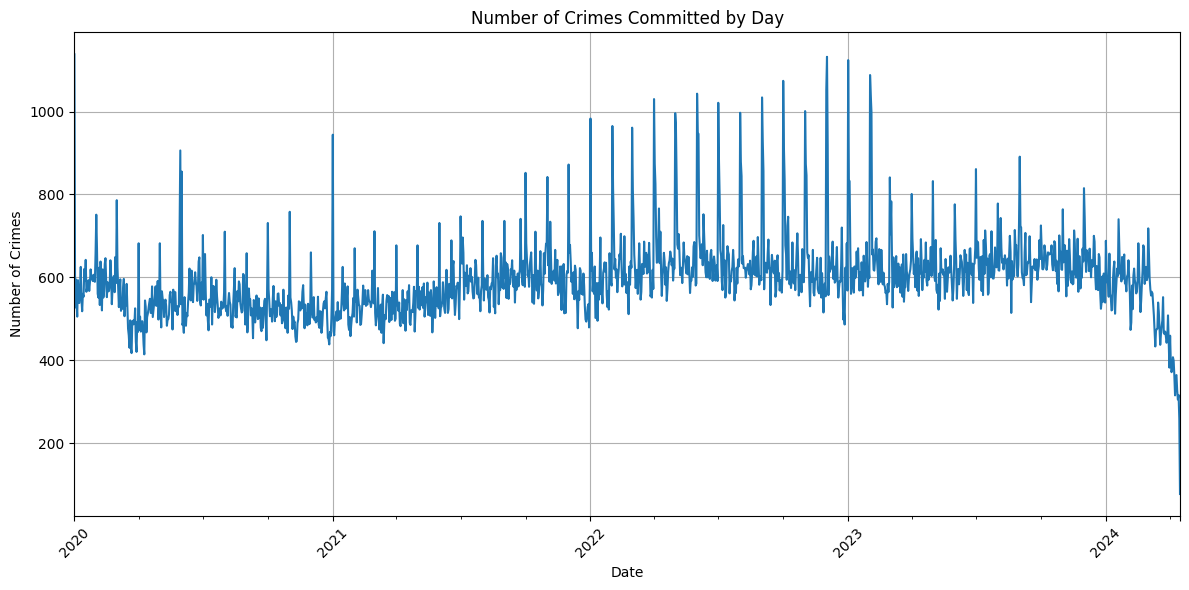

In [16]:
# Number of Crimes Committed by day graph
plt.figure(figsize=(12,6))
crime_count_by_date.plot(kind='line')
plt.title('Number of Crimes Committed by Day')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation= 45)
plt.grid(True)
plt.tight_layout()
plt.show()

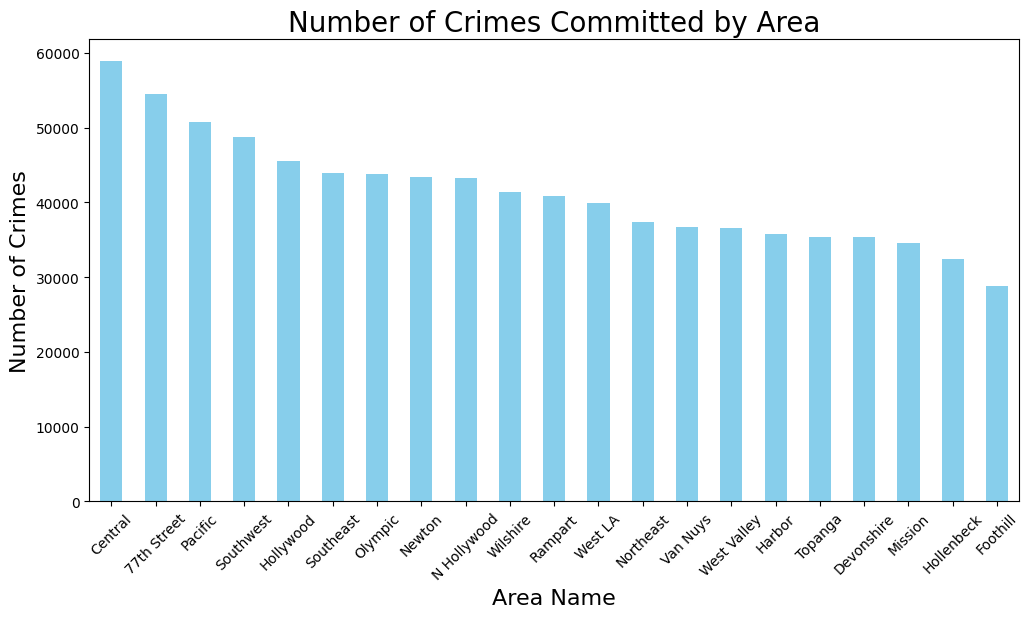

In [17]:
# Group by 'Area Name' and count the number of crimes

# Plotting the bar chart
plt.figure(figsize=(12, 6))
crime_count_by_area.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Committed by Area',fontsize=20)
plt.xlabel('Area Name',fontsize=16)
plt.ylabel('Number of Crimes',fontsize=16)
plt.xticks(rotation=45)
plt.savefig('Number of Crimes Committed by Area.png')
plt.show()

In [18]:
import seaborn as sns
# Group and count crimes by 'Area Name' and another category, for example, 'Crm Cd Desc'
crime_data = df.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='Count')
# Create a pivot table for the heatmap
pivot_table = crime_data.pivot('AREA NAME', 'Crm Cd Desc', 'Count')
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd') # 'YlOrRd' is a yellow-orange-red palette, symbolizing increasing temperatures
plt.title('Heatmap of Crimes Committed by Area')
plt.xlabel('Crime Type')
plt.ylabel('Area Name')
plt.savefig('Heatmap of Crimes Committed by Area.jpg')
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

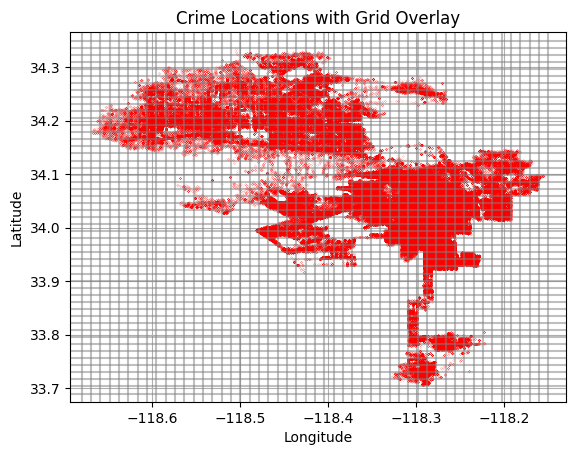

In [19]:
plt.plot(df["LON"],df["LAT"],'r.',markersize=0.1)

num_lat_cells = 50 # Change these based on your grid size
num_lon_cells = 50

# Define the size of each grid cell
lat_step = (lat_max - lat_min) / num_lat_cells  # num_lat_cells is the number of cells in latitude
lon_step = (lon_max - lon_min) / num_lon_cells  # num_lon_cells is the number of cells in longitude

# Creating the grid lines
lat_lines = np.linspace(lat_min, lat_max, num_lat_cells+1)
lon_lines = np.linspace(lon_min, lon_max, num_lon_cells+1)

# Drawing the grid lines
for lat in lat_lines:
    plt.axhline(y=lat, color='grey', linestyle='-', alpha=0.5)
for lon in lon_lines:
    plt.axvline(x=lon, color='grey', linestyle='-', alpha=0.5)

plt.title('Crime Locations with Grid Overlay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# Function to assign each crime to a grid cell
def assign_to_grid(lat, lon):
    lat_index = int((lat - lat_min) / lat_step)
    lon_index = int((lon - lon_min) / lon_step)
    return lat_index, lon_index

In [20]:
# Apply the function to your DataFrame
df['Grid_Cell'] = df.apply(lambda row: assign_to_grid(row['LAT'], row['LON']), axis=1)

# Group by 'Grid_Cell' and count crimes in each cell
crime_counts = df.groupby('Grid_Cell').size()

# Filter out grid cells with no crimes
crime_cells = crime_counts[crime_counts > 0].index.tolist()

# Keep only rows with crimes in the relevant grid cells
df = df[df['Grid_Cell'].isin(crime_cells)]

In [21]:
# Sort the grid cells by their spatial order
sorted_cells = sorted(crime_cells, key=lambda x: (x[0], x[1]))  # Sort by latitude index, then longitude index

# Create a mapping from grid cell to enumeration
cell_to_enum = {cell: i for i, cell in enumerate(sorted_cells)}

# Apply enumeration to DataFrame
df['Grid_Cell_Enum'] = df['Grid_Cell'].map(cell_to_enum)

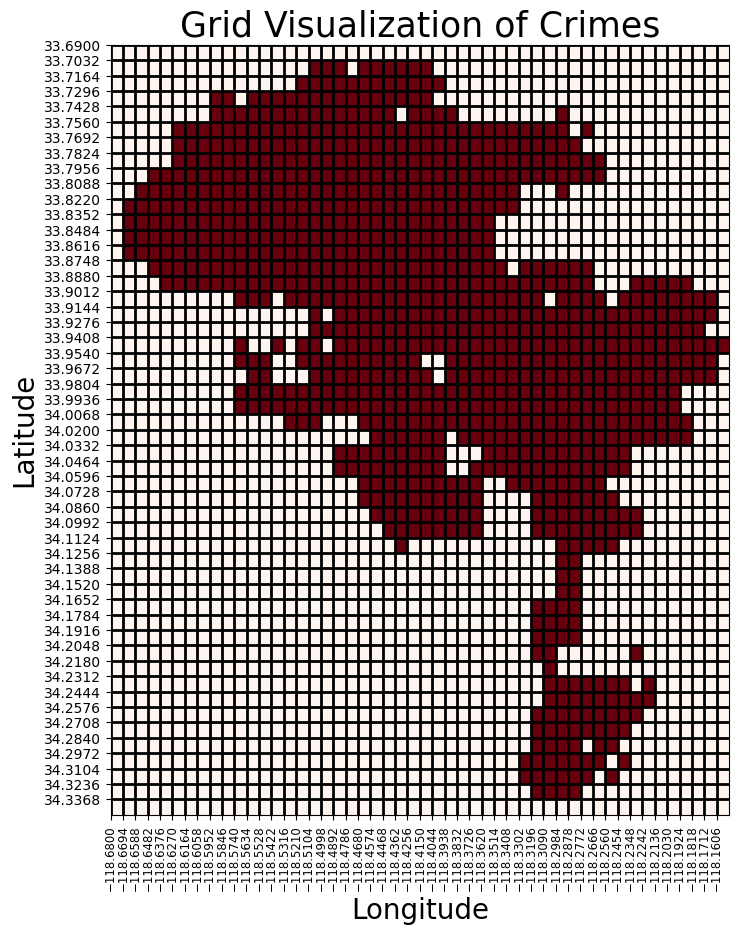

In [22]:
# Create a grid representation
num_lat_cells = int((lat_max - lat_min) / lat_step)
num_lon_cells = int((lon_max - lon_min) / lon_step)

# Initialize a grid of zeros (white cells)
grid = np.zeros((num_lat_cells, num_lon_cells))

# Mark cells with crimes as 1 (red cells)
for cell in df['Grid_Cell']:
    grid[cell[0], cell[1]] = 1


# Plot the grid
plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap='Reds', extent=[lon_min, lon_max, lat_min, lat_max])
plt.title('Grid Visualization of Crimes',fontsize=25)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
plt.xticks(np.arange(lon_min, lon_max, lon_step),rotation=90, fontsize=8.5)
plt.yticks(np.arange(lat_min, lat_max, lat_step))
plt.gca().invert_yaxis()  # Invert the y-axis
plt.savefig('Grid_Visualization_of_Crimes.png')
plt.show()

In [23]:
# Assuming your data is in a DataFrame named 'df'
# Replace 'df' with the name of your DataFrame variable
latitudes = df['LAT']
longitudes = df['LON']

# Creating a new DataFrame for plotting
crime_locations = pd.DataFrame({
    'Latitude': latitudes,
    'Longitude': longitudes
})


In [24]:
# Load Los Angeles shapefile
la_map = gpd.read_file('/Users/brandonwashington/Downloads/City_Boundary.shp')

# Check CRS of the Los Angeles map
print("LA Map CRS:", la_map.crs)

# Creating GeoDataFrame for crime data
gdf = gpd.GeoDataFrame(
    crime_locations,
    geometry=gpd.points_from_xy(crime_locations.Longitude, crime_locations.Latitude)
)
gdf.set_crs("EPSG:4326", inplace=True)
# Check CRS of crime data
print("Crime Data CRS:", gdf.crs)


import matplotlib.pyplot as plt

# Transform the crime data CRS to match the LA map CRS (EPSG:2229)
gdf = gdf.to_crs(la_map.crs)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
la_map.plot(ax=ax, color='white', edgecolor='black')  # Plot the LA map
gdf.plot(ax=ax, marker='o', color='red', markersize=1)  # Plot the crime data

# Set titles and labels
ax.set_title('Map of Crimes in Los Angeles')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

ERROR:fiona._env:/Users/brandonwashington/Downloads/City_Boundary.shp: No such file or directory


DriverError: /Users/brandonwashington/Downloads/City_Boundary.shp: No such file or directory

MovieWriter imagemagick unavailable; using Pillow instead.


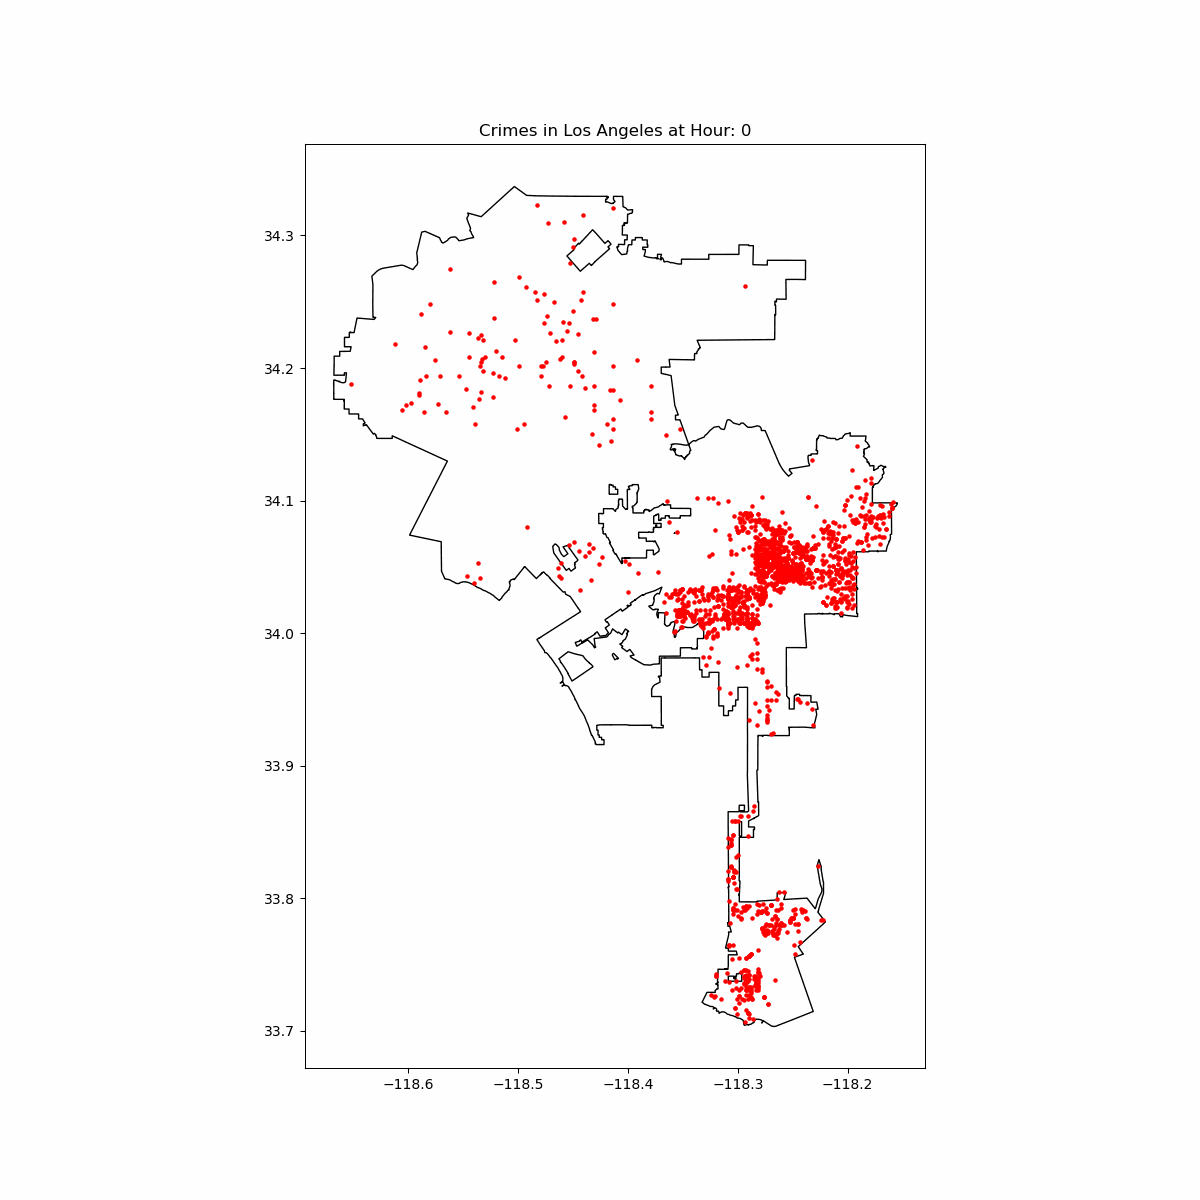

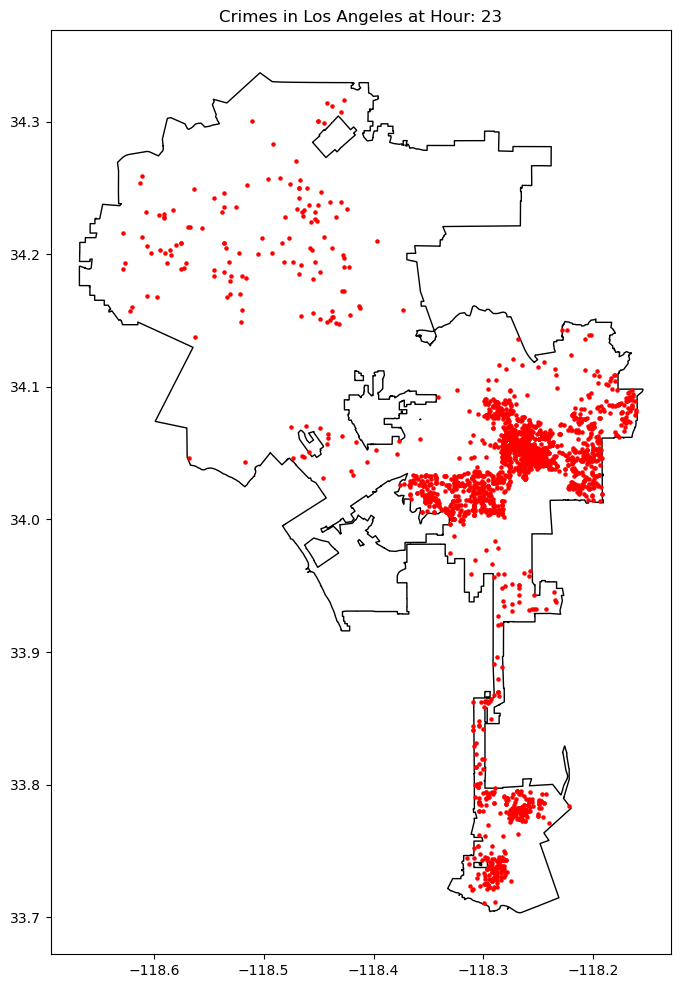

In [ ]:
def plot_crime_data_for_hour(hour, ax):
    # Filter data for the specific hour
    hourly_data = df[df['Hour of Day'] == hour]

    # Convert to GeoDataFrame
    gdf_hourly = gpd.GeoDataFrame(
        hourly_data,
        geometry=gpd.points_from_xy(hourly_data.LON, hourly_data.LAT)
    ).set_crs("EPSG:4326").to_crs(la_map.crs)

    # Clear previous data
    ax.clear()

    # Plot the base map
    la_map.plot(ax=ax, color='white', edgecolor='black')

    # Plot the crime data for the hour
    gdf_hourly.plot(ax=ax, marker='o', color='red', markersize=5)

    # Set title with the hour
    ax.set_title(f'Crimes in Los Angeles at Hour: {hour}')




# Create the base figure
fig, ax = plt.subplots(figsize=(12, 12))

# Creating the animation
ani = animation.FuncAnimation(fig, plot_crime_data_for_hour, frames=range(24), fargs=(ax,))

# Save the animation
ani.save('crime_animation.gif', writer='imagemagick', fps=2)  # Adjust fps (frames per second) as needed



Image(filename='/Users/brandonwashington/crime_animation.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


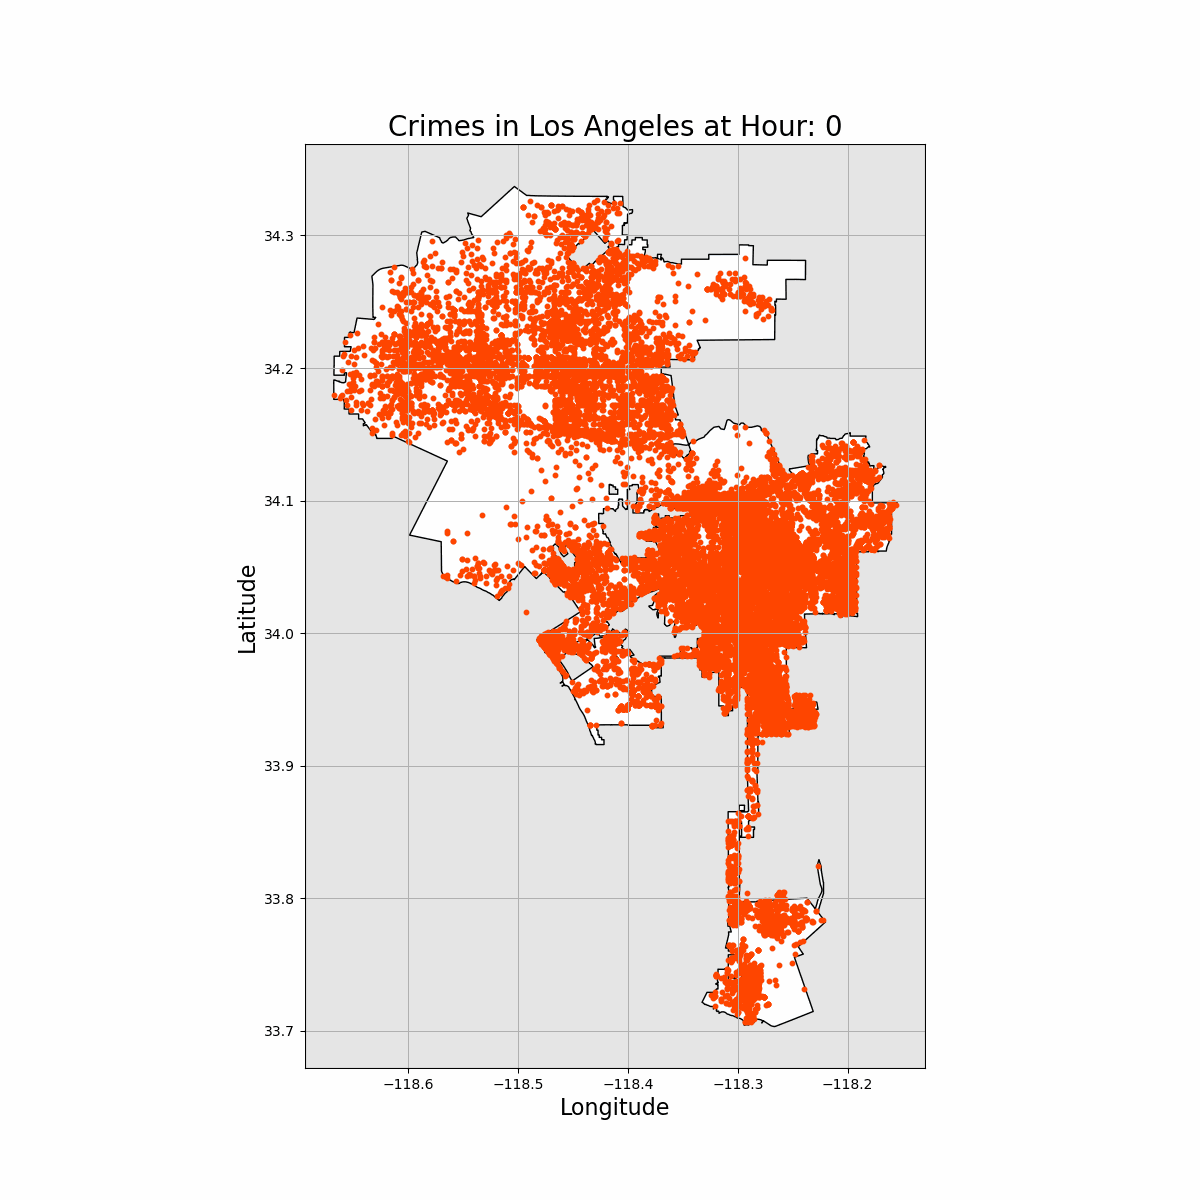

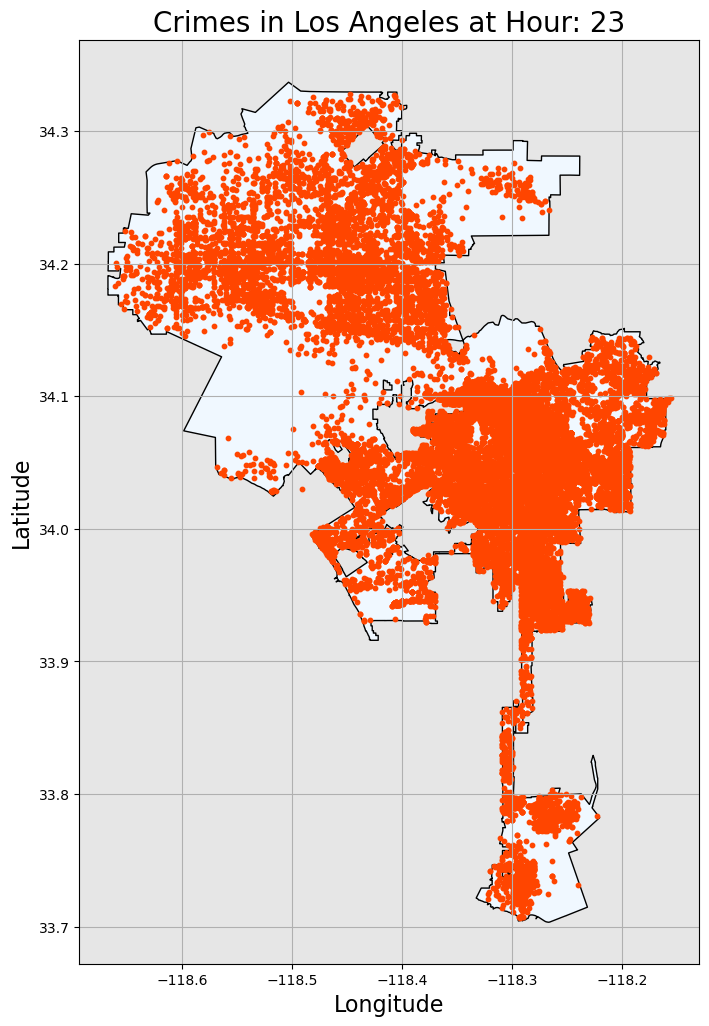

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import animation
from IPython.display import Image

def plot_crime_data_for_hour(hour, ax):
    # Filter data for the specific hour
    hourly_data = df[df['Hour of Day'] == hour]

    # Convert to GeoDataFrame
    gdf_hourly = gpd.GeoDataFrame(
        hourly_data,
        geometry=gpd.points_from_xy(hourly_data.LON, hourly_data.LAT)
    ).set_crs("EPSG:4326").to_crs(la_map.crs)

    # Clear previous data
    ax.clear()

    # Plot the base map (consider using a more detailed/styled base map)
    la_map.plot(ax=ax, color='#f0f8ff', edgecolor='black')

    # Plot the crime data for the hour
    gdf_hourly.plot(ax=ax, marker='o', color='#ff4500', markersize=10)

    # Set title with the hour
    ax.set_title(f'Crimes in Los Angeles at Hour: {hour}', fontsize=20)
    ax.set_xlabel('Longitude',fontsize=16)
    ax.set_ylabel('Latitude',fontsize=16)

    # Improve the aesthetics
    ax.grid(True)
    ax.set_facecolor('#e6e6e6')

# Create the base figure
fig, ax = plt.subplots(figsize=(12, 12))

# Creating the animation
ani = animation.FuncAnimation(fig, plot_crime_data_for_hour, frames=range(24), fargs=(ax,))

# Save the animation
ani.save('crime_animation.gif', writer='imagemagick', fps=2)  # Adjust fps as needed

# Display the animation
Image(filename='crime_animation.gif')


In [ ]:
df = df.sort_values(by=['DATE OCC', 'Hour of Day'])
df = df.reset_index()

# Assuming df is your DataFrame
# Ensure 'DATE OCC' and 'Hour' are already defined as described earlier

# Convert 'grid_cell_enum' to one-hot encoding
encoder = OneHotEncoder(sparse=False)
grid_cell_one_hot = encoder.fit_transform(df[['Grid_Cell_Enum']])
# Convert the one-hot encoding to a DataFrame
grid_cell_one_hot_df = pd.DataFrame(grid_cell_one_hot, columns=[f'cell_{i}' for i in range(grid_cell_one_hot.shape[1])])
# Concatenate with the original DataFrame
df2 = pd.concat([df['DATE OCC'],df['Hour of Day'],df['Months'],df['Days of Week'], grid_cell_one_hot_df], axis=1)
# Group by 'DATE OCC' and 'Hour', and sum the one-hot encoded vectors
grouped = df2.groupby(['DATE OCC', 'Hour of Day','Months','Days of Week']).sum()
# The resulting 'grouped' DataFrame contains the aggregated one-hot vectors for each hour of each day



# Assuming 'grouped' is your DataFrame and it includes one-hot encoded columns like 'cell_0', 'cell_1', etc.

# List of one-hot encoded columns
one_hot_columns = [col for col in grouped.columns if col.startswith('cell_')]

# Convert values > 0 to 1 in one-hot encoded columns
for col in one_hot_columns:
    grouped[col] = grouped[col].apply(lambda x: 1 if x > 0 else 0)

# Now, all your one-hot encoded columns have values as either 0 or 1

grouped.reset_index(inplace=True)
grouped = grouped.drop(columns = ['DATE OCC'], index=1)

KeyboardInterrupt: 

In [ ]:
# Define a split point, for example, 80% for training and 20% for testing
split_point = int(len(grouped) * 0.95)

# Split the data
train_df = grouped.iloc[:split_point]
test_df = grouped.iloc[split_point:]


# Columns to scale
columns_to_scale = ['Hour of Day', 'Months', 'Days of Week']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])

# Transform the test data
test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])

In [ ]:
def create_sequences(input_data, target_columns, sequence_length):
    X = []
    y = []
    for i in range(len(input_data) - sequence_length):
        X.append(input_data.iloc[i:(i + sequence_length)].values)
        y.append(input_data.iloc[i + sequence_length][target_columns].values)
    return np.array(X), np.array(y)

# Define the sequence length
sequence_length = 24  # Example length

# Define target columns (the grid cells)
target_columns = [col for col in train_df.columns if col.startswith('cell_')]

# Create sequences and targets
X_train, y_train = create_sequences(train_df, target_columns, sequence_length)
X_test, y_test = create_sequences(test_df, target_columns, sequence_length)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Flatten y_train to a 1D array to compute class weights
y_train_flattened = y_train.flatten()

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_flattened),
    y=y_train_flattened
)

# Convert class weights to a dictionary
class_weight_dict = dict(enumerate(class_weights))


In [ ]:
# Calculate class weights for binary classification
weight_for_0 = (1 / np.sum(y_train_flattened == 0)) * (len(y_train_flattened) / 2.0)
weight_for_1 = (1 / np.sum(y_train_flattened == 1)) * (len(y_train_flattened) / 2.0)

# Use the average of these weights for training
average_class_weight = (weight_for_0 + weight_for_1) / 2

# Define the class weight dictionary
class_weight_dict = {0: average_class_weight, 1: average_class_weight}


In [ ]:
class_weight_dict

{0: 23.8012740976233, 1: 23.8012740976233}

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy
        return K.mean(loss, axis=1)
    return focal_loss_fixed

# Then use this loss function when compiling your model
#model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=4.), metrics=['accuracy'])

In [ ]:
def custom_binary_crossentropy(y_true, y_pred):
    """
    Custom Binary Cross-Entropy Loss for multi-label classification.

    :param y_true: True labels
    :param y_pred: Predicted labels
    :return: Loss value
    """
    # Clip to prevent NaN's and Inf's
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())

    # Calculate binary cross-entropy loss
    loss = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)


    # Count the number of positive cases (1's) in y_true
    num_positives = tf.reduce_sum(y_true, axis=-1)

    # Avoid division by zero
    num_positives = tf.where(tf.equal(num_positives, 0), tf.ones_like(num_positives), num_positives)

    # Return the mean loss per sample
    return tf.reduce_sum(loss, axis=-1) / num_positives

In [ ]:
def weighted_binary_crossentropy(y_true, y_pred, weight_positive=1.5, weight_negative=3.0):
    """
    Weighted Binary Cross-Entropy Loss for multi-label classification,
    with more penalty for false negatives than false positives.

    :param y_true: True labels
    :param y_pred: Predicted labels
    :param weight_positive: Weight for loss when y_true is 1
    :param weight_negative: Weight for loss when y_true is 0
    :return: Loss value
    """
    # Clip to prevent NaN's and Inf's
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())

    # Calculate weighted loss
    loss = -weight_positive * y_true * tf.math.log(y_pred) - weight_negative * (1 - y_true) * tf.math.log(1 - y_pred)

    # Count the number of positive cases (1's) in y_true
    num_positives = tf.reduce_sum(y_true, axis=-1)

    # Avoid division by zero
    num_positives = tf.where(tf.equal(num_positives, 0), tf.ones_like(num_positives), num_positives)

    # Sum the losses and divide by the number of positives
    return tf.reduce_sum(loss, axis=-1) / num_positives

In [ ]:
# Build the LSTM model with two LSTM layers
n_features = X_train.shape[2]

model = tf.keras.models.Sequential([

    #tf.keras.layers.LSTM(50, input_shape=(time_steps, num_features),return_sequences=True),
    #tf.keras.layers.LSTM(32,return_sequences=True),
    #tf.keras.layers.LSTM(32)
    #tf.keras.layers.LSTM(32),
    tf.keras.layers.LSTM(50,return_sequences=False, input_shape=(sequence_length, n_features)),
    #tf.keras.layers.LSTM(100,return_sequences=False),
    #tf.keras.layers.Dense(150,activation='relu',input_shape=(sequence_length, n_features)),
    #tf.keras.layers.Dense(100,activation='relu'),
    #tf.keras.layers.Dense(100,activation='relu'),
    #tf.keras.layers.Dense(100,activation='relu'),
    #tf.keras.layers.Dense(50,activation='relu'),
    #tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='linear'),
    tf.keras.layers.Dense(units=y_train.shape[1], activation='sigmoid')  # Second RNN layer (you can use LSTM or GRU here as well)
])
model.add(Dropout(0.2))

In [ ]:
# Compile & Fit Model

epochs=30
batch_size=32

# Optimizers
learning_rate = 100
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-7  # Small constant to avoid division by zero

# Common loss Functions
loss_1 = 'mse'
loss_2 = 'mae'
loss_3 = 'binary_crossentropy'
loss_4 = 'categorical_crossentropy'
loss_5 = 'sparse_categorical_crossentropy'

# Custom optimizer settings:
optimizer_1 = tf.keras.optimizers.Adam(learning_rate = learning_rate)
optimizer_2 = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta1, beta_2=beta2, epsilon=epsilon)

# Compile the model
model.compile(
    optimizer = optimizer_1,
    loss=lambda y_true, y_pred:weighted_binary_crossentropy(y_true, y_pred, weight_positive=1.5, weight_negative=3.0),
    #loss = focal_loss(gamma=2., alpha=4.),
    metrics = ['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/30
387/387 [==============================] - 14s 26ms/step - loss: 25.1978 - accuracy: 0.0025
Epoch 2/30
320/387 [=======================>......] - ETA: 2s - loss: 24.1772 - accuracy: 0.0024

KeyboardInterrupt: 

In [ ]:
# Feed the model test data so that it can make predictions

predictions = model.predict(X_test)
predicted_directions = (predictions > 0.5).astype(int) # Boolean which says our predicted directions
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0
# Compare the model's predictions with the actual directions in the test data
actual_directions = y_test #The values() method returns a view object. The view object contains the values of the dictionary, as a list. The view object will reflect any changes done to the dictionary

20/20 [==============================] - 1s 13ms/step


In [ ]:
predicted_directions[l]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
l = 400
predictions[l]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_test[l]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
right = 0
wrong = 0
one_count_y = 0
one_count_p = 0
one_right = 0
one_wrong_count = 0
for j in range(len(predictions)):
    for i in range(len(predictions[j])):
        if y_test[j][i] == predictions[j][i]:
            right = right + 1
        else:
            wrong = wrong + 1

        if y_test[j][i] == 1:
            one_count_y = one_count_y + 1

        if predictions[j][i] == 1:
            one_count_p = one_count_p + 1

        if (predictions[j][i] == y_test[j][i]) and (y_test[j][i] == 1):
            one_right = one_right + 1

        if (predictions[j][i] == 1) and (y_test[j][i] == 0):
            one_wrong_count = one_wrong_count + 1

In [ ]:
print("Total number of times model predicted crime event outcome correctly:",right)
print("\nTotal number of times model predicted crime event outcome incorrectly:",wrong)
print("\nTotal number of times model predicted crime would occur in Test Set:",one_count_p)
print("\nTotal number of times crime actually occured in Test Set:",one_count_y)
print("\nNumber of times model predicted crime occuring and crime did occur:",one_right)
print("\nNumber of times model predicted crime occuring and crime did NOT occur:", one_wrong_count)
print("\nIdeally we want Predicted Crimes / Actual Crimes to be 1. Right now it sits at", round(one_right/one_count_y,2))

Total number of times model predicted crime event outcome correctly: 33473

Total number of times model predicted crime event outcome incorrectly: 159969

Total number of times model predicted crime would occur in Test Set: 161720

Total number of times crime actually occured in Test Set: 1979

Number of times model predicted crime occuring and crime did occur: 1865

Number of times model predicted crime occuring and crime did NOT occur: 159855

Ideally we want Predicted Crimes / Actual Crimes to be 1. Right now it sits at 0.94
